In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
path='D:\\Artificial Intelligence\\1-Data Pre-processing\\3-Outliers (Detecting and Filtering)\\2-Z Method\\weight-height.csv'
data=pd.read_csv(path)

In [15]:
data=data.drop('Weight',axis=1)

In [16]:
data.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


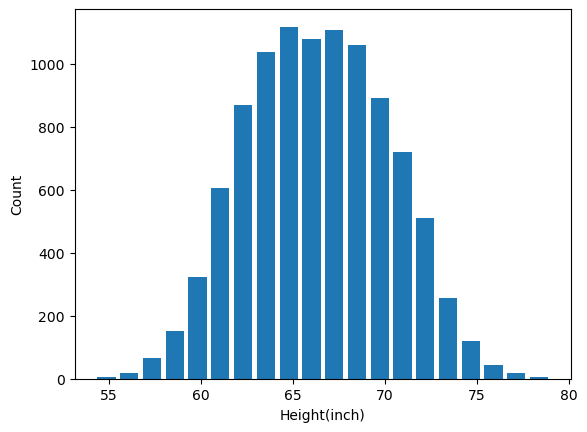

In [17]:
plt.hist(data['Height'],bins=20,rwidth=0.8)
plt.xlabel('Height(inch)')
plt.ylabel('Count')
plt.show()

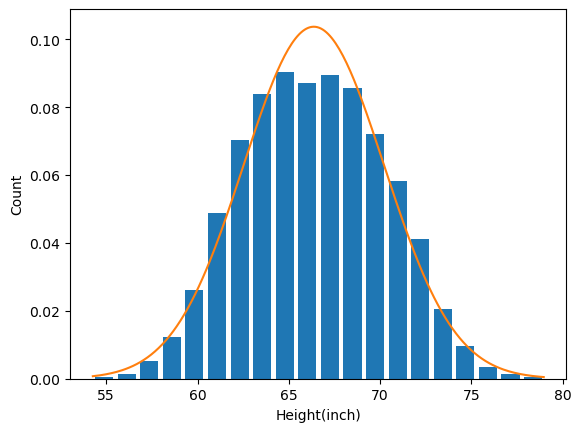

In [44]:
from scipy.stats import norm
plt.hist(data['Height'],bins=20,rwidth=0.8,density=True)
plt.xlabel('Height(inch)')
plt.ylabel('Count')
rng=np.arange(data.Height.min(),data.Height.max(),0.1)
plt.plot(rng,norm.pdf(rng,data.Height.mean(),data.Height.std()))
plt.show()

In [20]:
#not founded outliers is very small
#use 3std to remove outliers
upper_limit=data.Height.mean()+3*data.Height.std()
upper_limit

77.91014411714076

In [26]:
lower_limit=data.Height.mean()-3*data.Height.std()
lower_limit

54.82497539250136

In [27]:
#outlier detection
#this method called std removal
data[(data.Height>upper_limit)|(data.Height<lower_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [32]:
#after remove outliers
data_no_outliers=data[(data.Height<upper_limit) & (data.Height>lower_limit)]

In [33]:
data_no_outliers.shape

(9993, 2)

In [34]:
data.shape

(10000, 2)

In [39]:
print('total outliers that remvoed is',data.shape[0]-data_no_outliers.shape[0])

total outliers that remvoed is 7


In [45]:
#2-Z-Score mehtod
data['Z-Score']=(data.Height-data.Height.mean())/data.Height.std()
data.head(5)

,Gender,Height,Z-Score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [48]:
#range of zscore is from 3 to -3 (std is 3)
#std how data points far away from mean

#upper_limit
data[data['Z-Score']>3]

,Gender,Height,Z-Score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [49]:
#lower limit
data[data['Z-Score']<-3]

,Gender,Height,Z-Score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [52]:
df_no_outlier=data[(data['Z-Score']<3)&(data['Z-Score']>-3)]

In [53]:
df_no_outlier

,Gender,Height,Z-Score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [54]:
df_no_outlier.shape

(9993, 3)